In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
app = pd.read_csv('application_data.csv')
per = pd.read_csv('previous_application.csv')

In [4]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
per.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# DATA CLEANING FOR APPLICATION DATASET

In [6]:
missing_percentage = app.isna().mean() * 100

In [7]:
columns_to_drop = missing_percentage[missing_percentage > 40].index

In [8]:
app1 = app.drop(columns=columns_to_drop)

In [9]:
app1.shape

(307511, 73)

In [10]:
#Null after droping columns more than 40%
app1.isnull().sum()/len(app1)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 73, dtype: float64

In [11]:
#It is observed that columns "AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"
#has same ammount of null value percentage
same_null = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

In [12]:
app['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [13]:
app['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [14]:
app['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [15]:
app['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [16]:
app['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [17]:
app['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [18]:
#For this we will replace the null vlaues with the mod vlaue
app1['AMT_REQ_CREDIT_BUREAU_HOUR']=app1['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0)
app1['AMT_REQ_CREDIT_BUREAU_DAY']=app1['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0)
app1['AMT_REQ_CREDIT_BUREAU_WEEK']=app1['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0)
app1['AMT_REQ_CREDIT_BUREAU_MON']=app1['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0)
app1['AMT_REQ_CREDIT_BUREAU_QRT']=app1['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0)
app1['AMT_REQ_CREDIT_BUREAU_YEAR']=app1['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0)

In [19]:
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
app1.isnull().sum()/len(app1)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [20]:
pd.reset_option('display.max_rows', None)  
pd.reset_option('display.max_columns', None) 

In [21]:
app1['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [22]:
app1['OCCUPATION_TYPE'].isnull().sum()

96391

In [23]:
app1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.643447
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.855821
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [24]:
#Dropping unwanted columns
unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

app1.drop(labels=unwanted,axis=1,inplace=True)
app1.shape

(307511, 43)

In [25]:
app1['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [26]:
#Replacing XNA in "Gender" with F
app1.loc[app1['CODE_GENDER']=='XNA','CODE_GENDER']='F'
app1['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [27]:
app1.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OCCUPATION_TYPE                 object
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGIO

In [28]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)
target0=app1.loc[app1["TARGET"]==0]
target1=app1.loc[app1["TARGET"]==1]
print(target0.shape)
print(target1.shape)

(282686, 43)
(24825, 43)


In [29]:
#Dropping null occupation from both target dataframe
target0['OCCUPATION_TYPE']=target0['OCCUPATION_TYPE'].dropna()
target1['OCCUPATION_TYPE']=target1['OCCUPATION_TYPE'].dropna()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22592\3870300237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target0['OCCUPATION_TYPE']=target0['OCCUPATION_TYPE'].dropna()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22592\3870300237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target1['OCCUPATION_TYPE']=target1['OCCUPATION_TYPE'].dropna()


In [30]:
# Calculating Imbalance percentage    
# Since the majority is target0 and minority is target1
round(len(target0)/len(target1),2)

11.39

# DATACLEANING FOR PREVIOUS APPLICATION DATASET

In [31]:
missing_percentage = per.isna().mean() * 100

In [32]:
columns_to_drop = missing_percentage[missing_percentage > 40].index

In [33]:
per1=per.drop(columns=columns_to_drop)

In [34]:
#Null after droping columns more than 40%
per1.isnull().sum()/len(per1)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

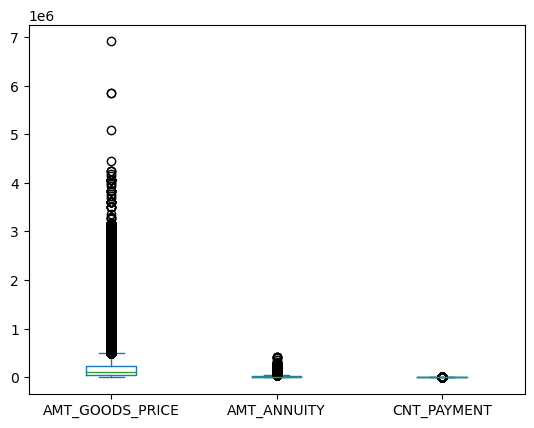

In [35]:
per1[['AMT_GOODS_PRICE','AMT_ANNUITY','CNT_PAYMENT']].plot.box()
plt.show()

# UNIVARIATE ANALYSIS FOR APPLICATION DATASET

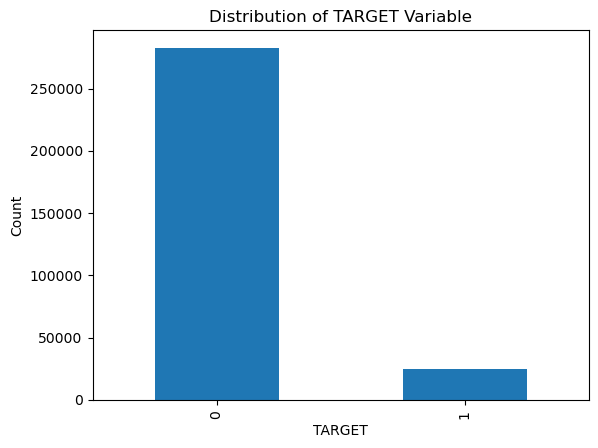

In [47]:
app1['TARGET'].value_counts().plot.bar()
hei=np.array(len(app1['TARGET']))
plt.xlabel('TARGET')
plt.ylabel('Count')
plt.title('Distribution of TARGET Variable')
plt.show()

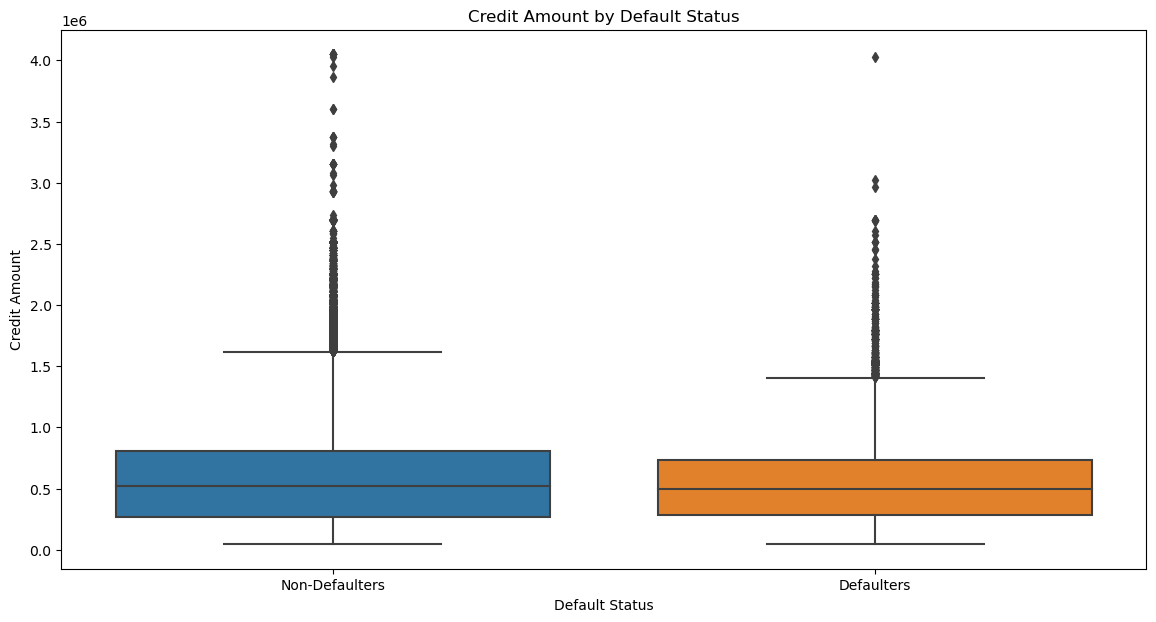

In [57]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=app1)
plt.title('Credit Amount by Default Status')
plt.xlabel('Default Status')
plt.ylabel('Credit Amount')
plt.xticks([0, 1], ['Non-Defaulters', 'Defaulters'])
plt.show()

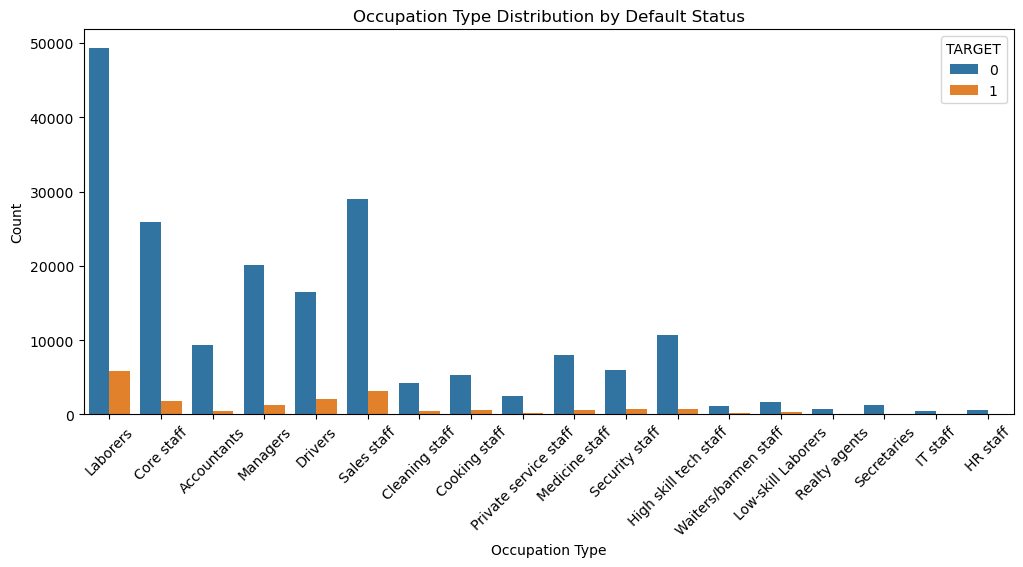

In [58]:
plt.figure(figsize=(12, 5))
sns.countplot(x='OCCUPATION_TYPE', hue='TARGET', data=app1)
plt.title('Occupation Type Distribution by Default Status')
plt.xticks(rotation=45)
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22592\3363299840.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(app1[app1['TARGET'] == 0]['AMT_ANNUITY'], shade=True, label='Non-Defaulters')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22592\3363299840.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(app1[app1['TARGET'] == 1]['AMT_ANNUITY'], shade=True, label='Defaulters')


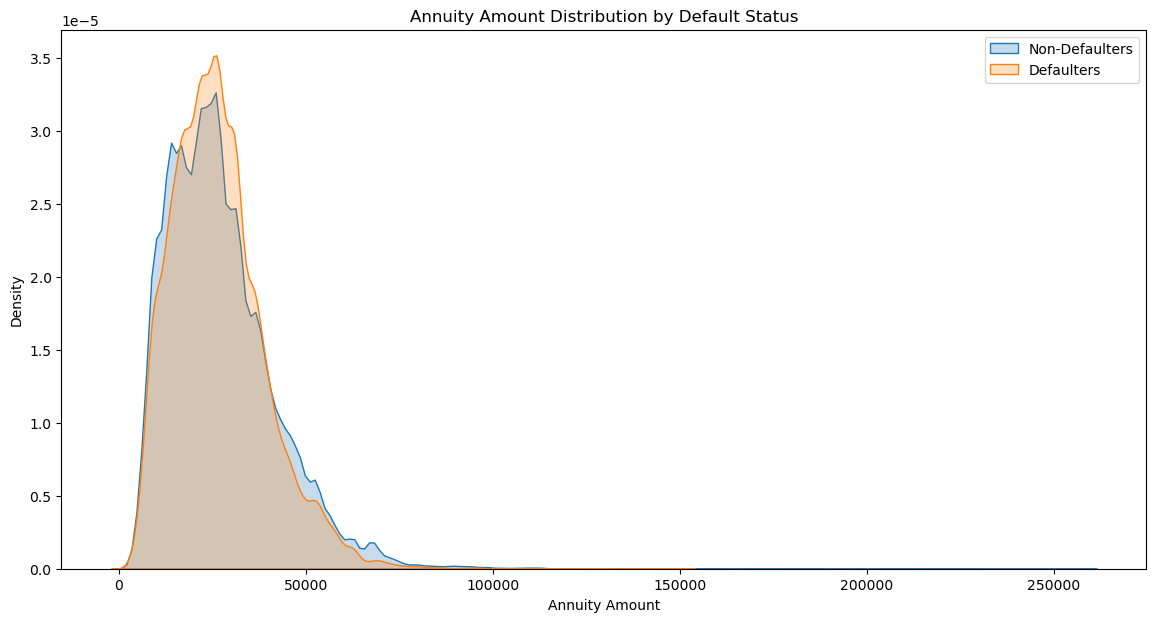

In [59]:
plt.figure(figsize=(14, 7))
sns.kdeplot(app1[app1['TARGET'] == 0]['AMT_ANNUITY'], shade=True, label='Non-Defaulters')
sns.kdeplot(app1[app1['TARGET'] == 1]['AMT_ANNUITY'], shade=True, label='Defaulters')
plt.title('Annuity Amount Distribution by Default Status')
plt.xlabel('Annuity Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

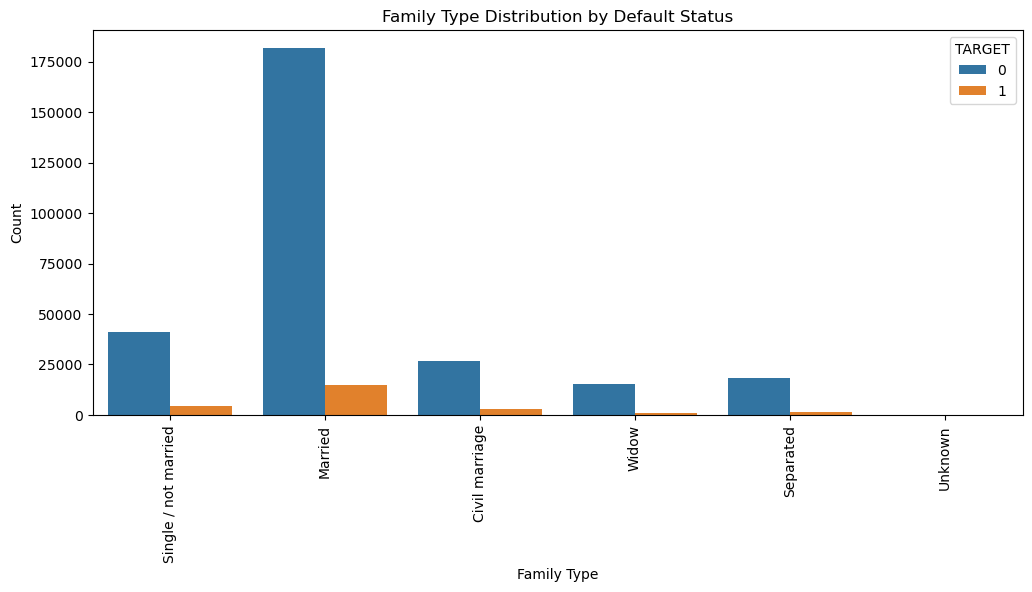

In [60]:
plt.figure(figsize=(12, 5))
sns.countplot(x='NAME_FAMILY_STATUS', hue='TARGET', data=app1)
plt.title('Family Type Distribution by Default Status')
plt.xticks(rotation=90)
plt.xlabel('Family Type')
plt.ylabel('Count')
plt.show()

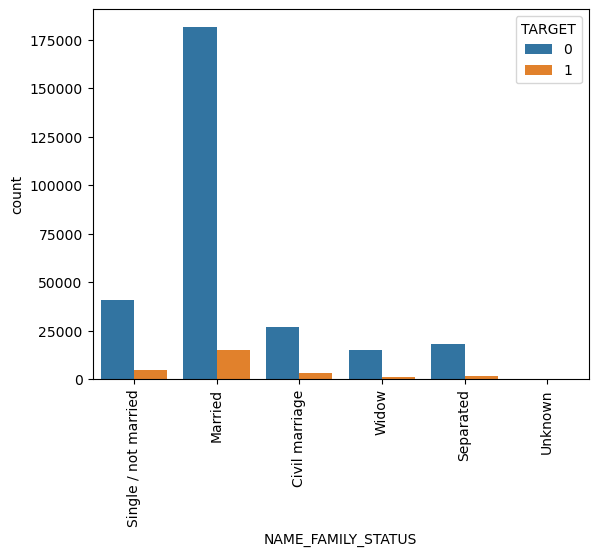

In [61]:
sns.countplot(x='NAME_FAMILY_STATUS', hue='TARGET', data=app1)
plt.xticks(rotation=90)
plt.show()

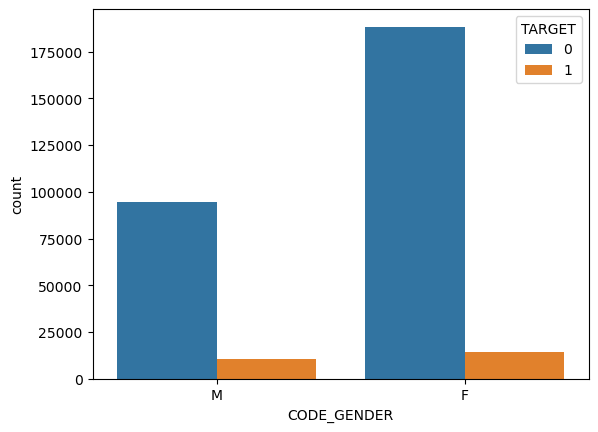

In [62]:
sns.countplot(x='CODE_GENDER', hue='TARGET', data=app1)
plt.show()

# BIAVARIATE ANALYSIS FOR APPLICATION DATASET

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22592\3746509318.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = app1.corr()


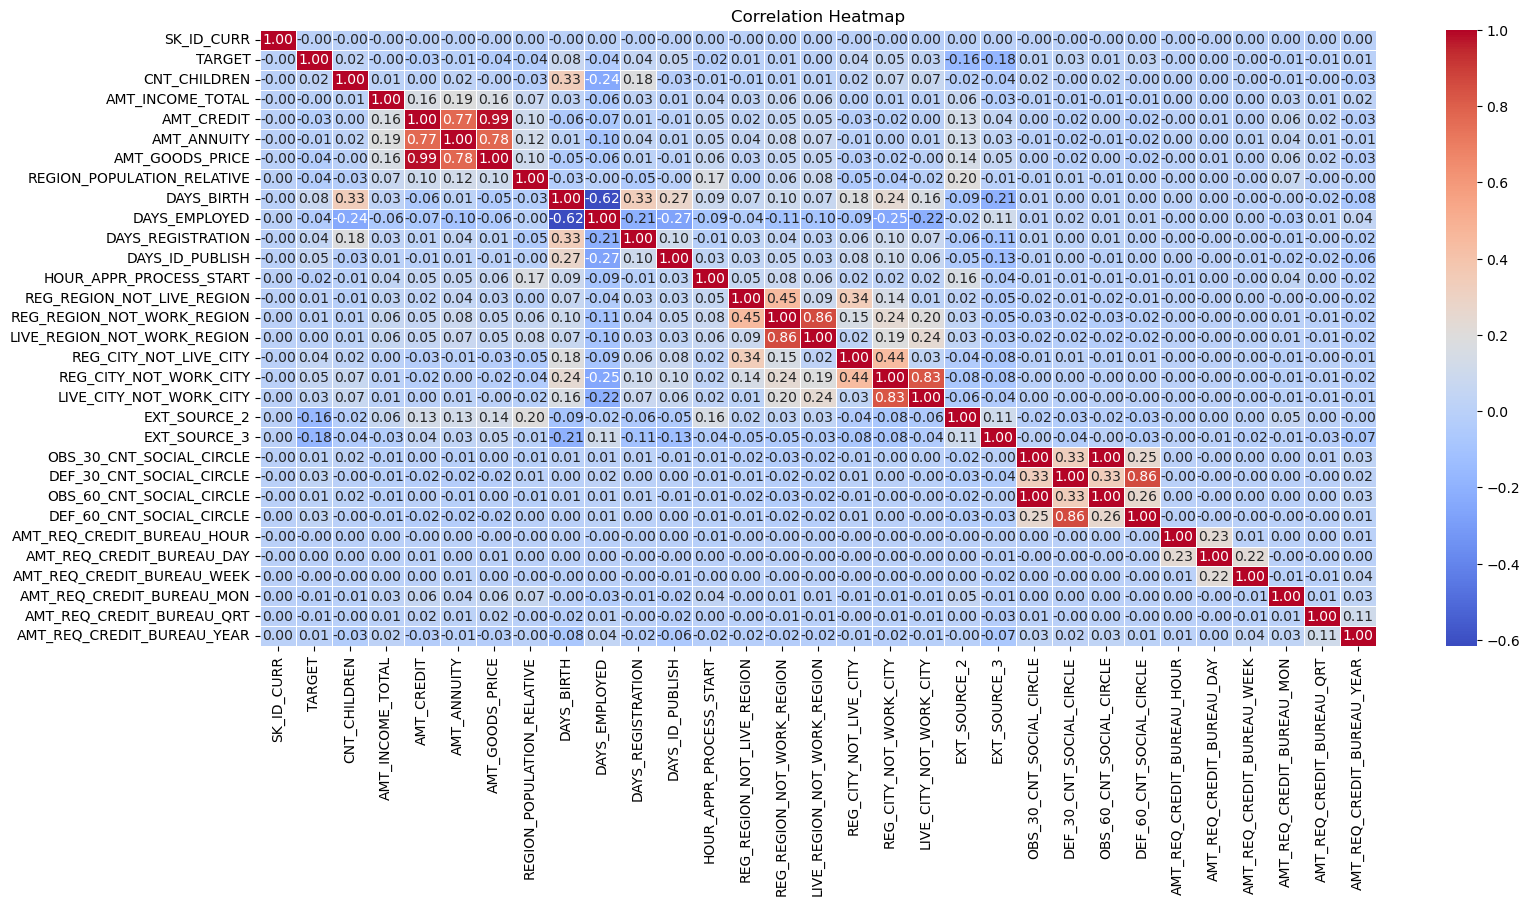

In [63]:
correlation_matrix = app1.corr()

plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


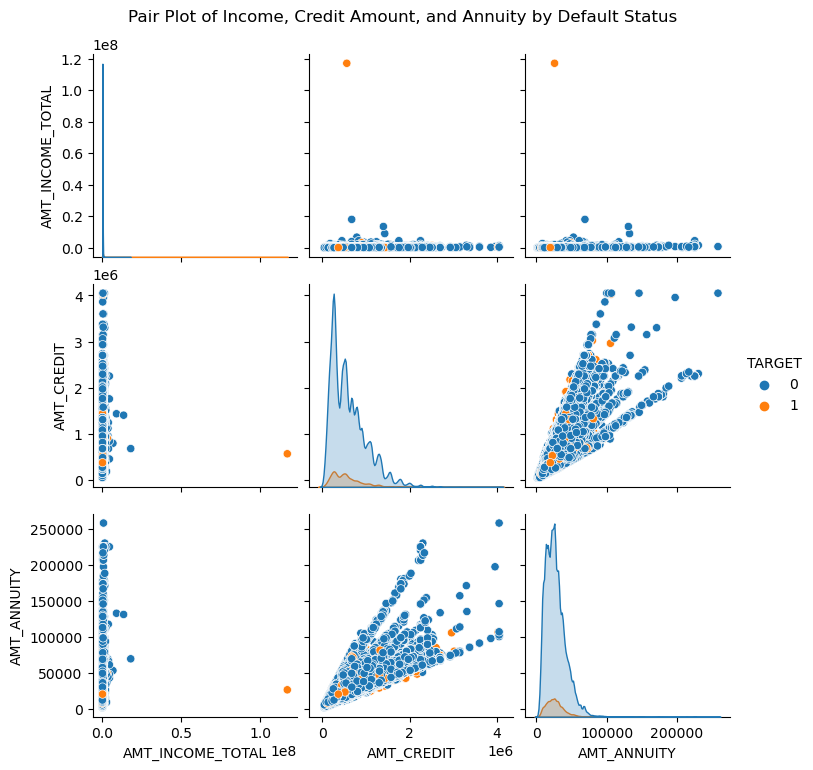

In [64]:
sns.pairplot(app1, hue='TARGET', vars=['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY'])
plt.suptitle('Pair Plot of Income, Credit Amount, and Annuity by Default Status', y=1.02)
plt.show()

# UNIVARIATE ANALYSIS FOR PREVIOUS APPLICATION DATASET

In [65]:
comb_data = pd.merge(app1, per1, on='SK_ID_CURR', how='left')
comb_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430150,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,24.0,middle,Cash X-Sell: middle
1430151,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Repeater,XNA,Cards,walk-in,Country-wide,20.0,Connectivity,0.0,XNA,Card Street
1430152,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,60.0,low_normal,Cash Street: low
1430153,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6.0,XNA,36.0,low_normal,Cash X-Sell: low


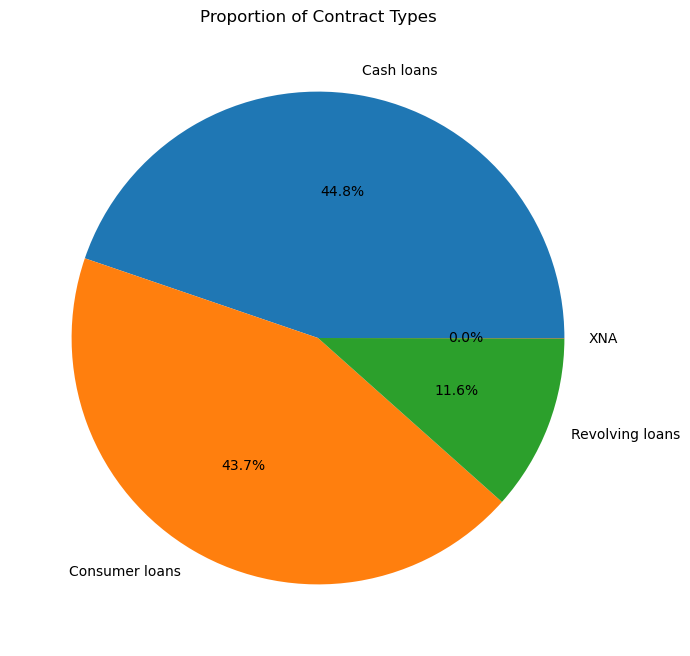

In [66]:
# Count of each category
contract_type_counts = per1['NAME_CONTRACT_TYPE'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(contract_type_counts, labels=contract_type_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Contract Types')
plt.show()


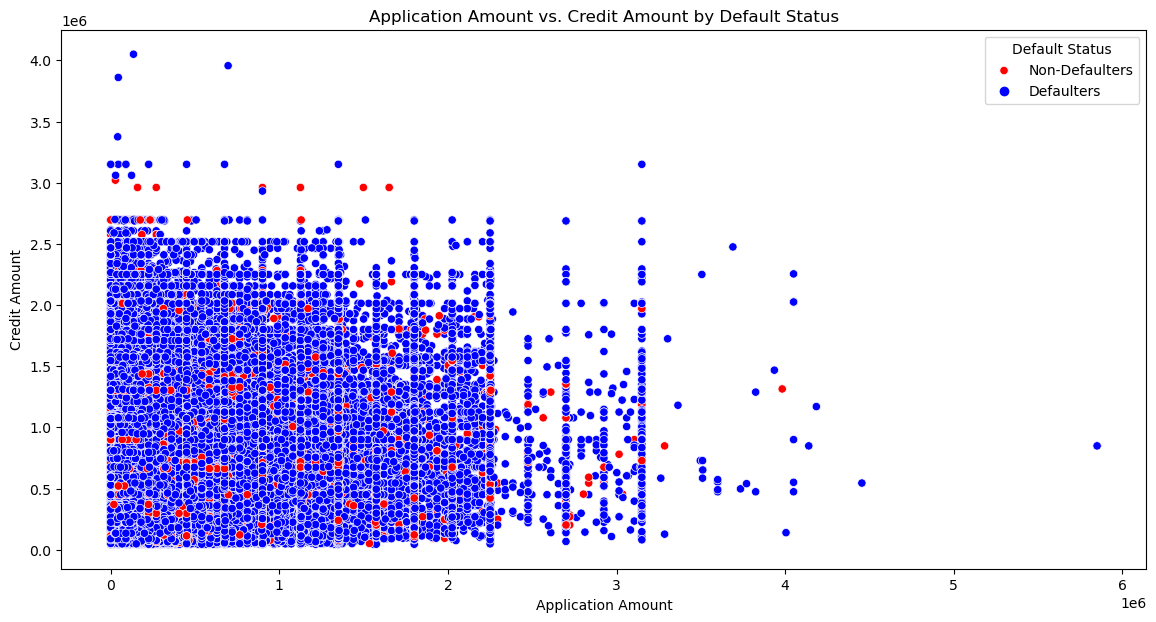

In [67]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='AMT_APPLICATION', y='AMT_CREDIT_x', hue='TARGET', data=comb_data,palette={0: 'blue', 1: 'red'})
plt.title('Application Amount vs. Credit Amount by Default Status')
plt.xlabel('Application Amount')
plt.ylabel('Credit Amount')
plt.legend(title='Default Status', labels=['Non-Defaulters', 'Defaulters'])
plt.show()

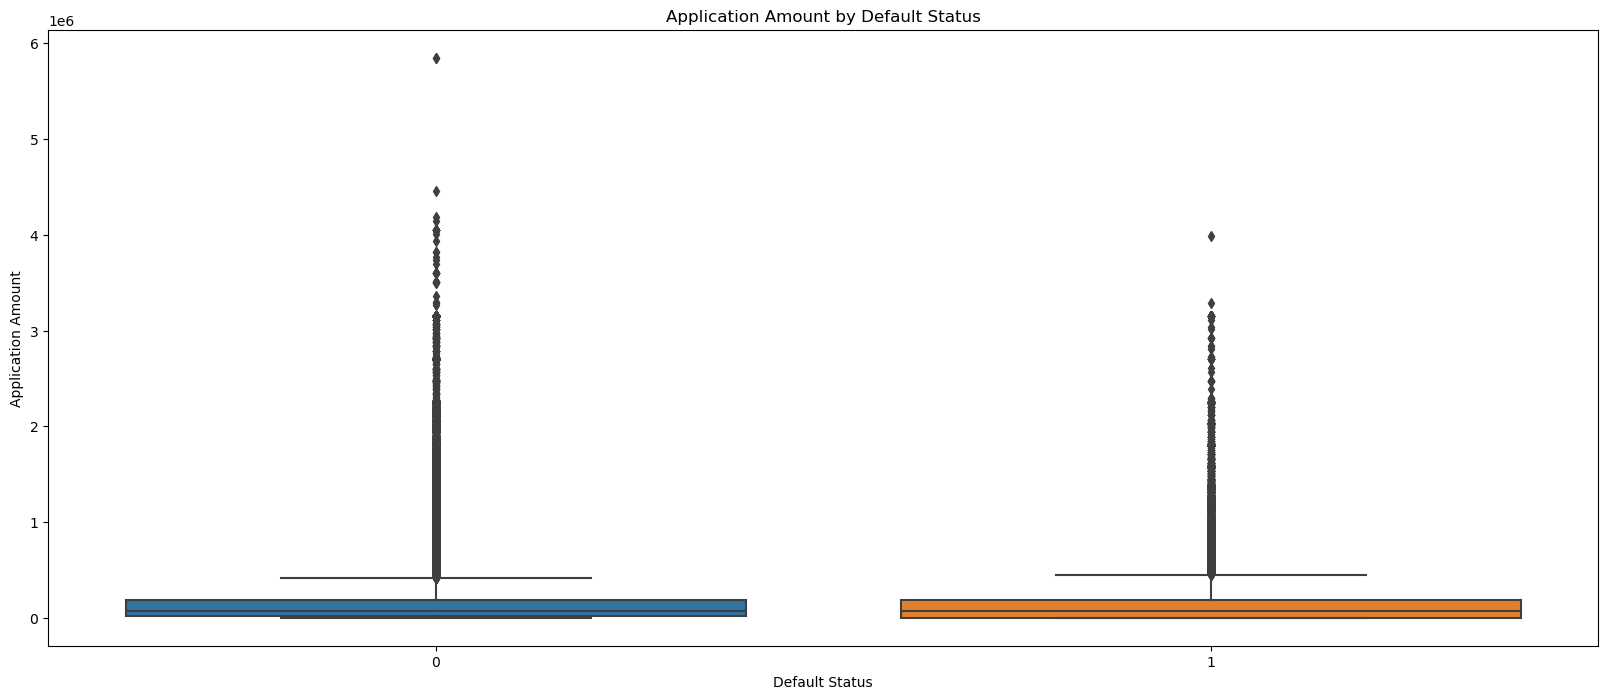

In [68]:
plt.figure(figsize=(20,8))
sns.boxplot(x='TARGET', y='AMT_APPLICATION', data=comb_data)
plt.title('Application Amount by Default Status')
plt.xlabel('Default Status')
plt.ylabel('Application Amount')
plt.show()

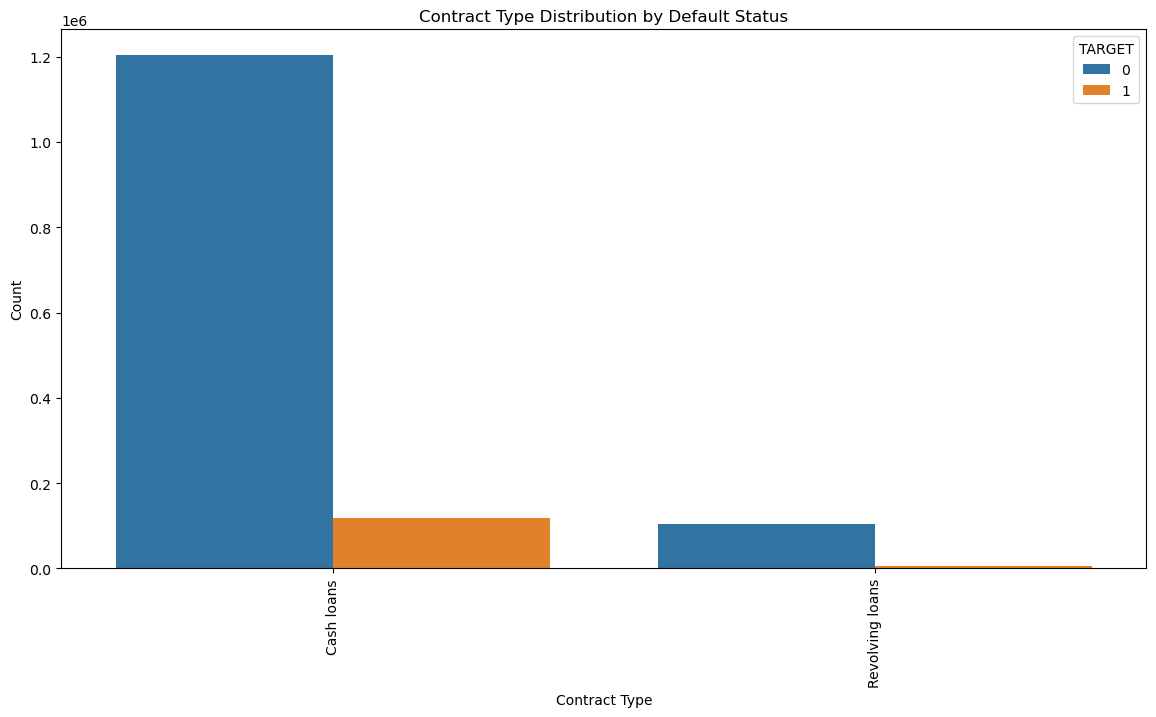

In [69]:
plt.figure(figsize=(14, 7))
sns.countplot(x='NAME_CONTRACT_TYPE_x', hue='TARGET', data=comb_data)
plt.title('Contract Type Distribution by Default Status')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

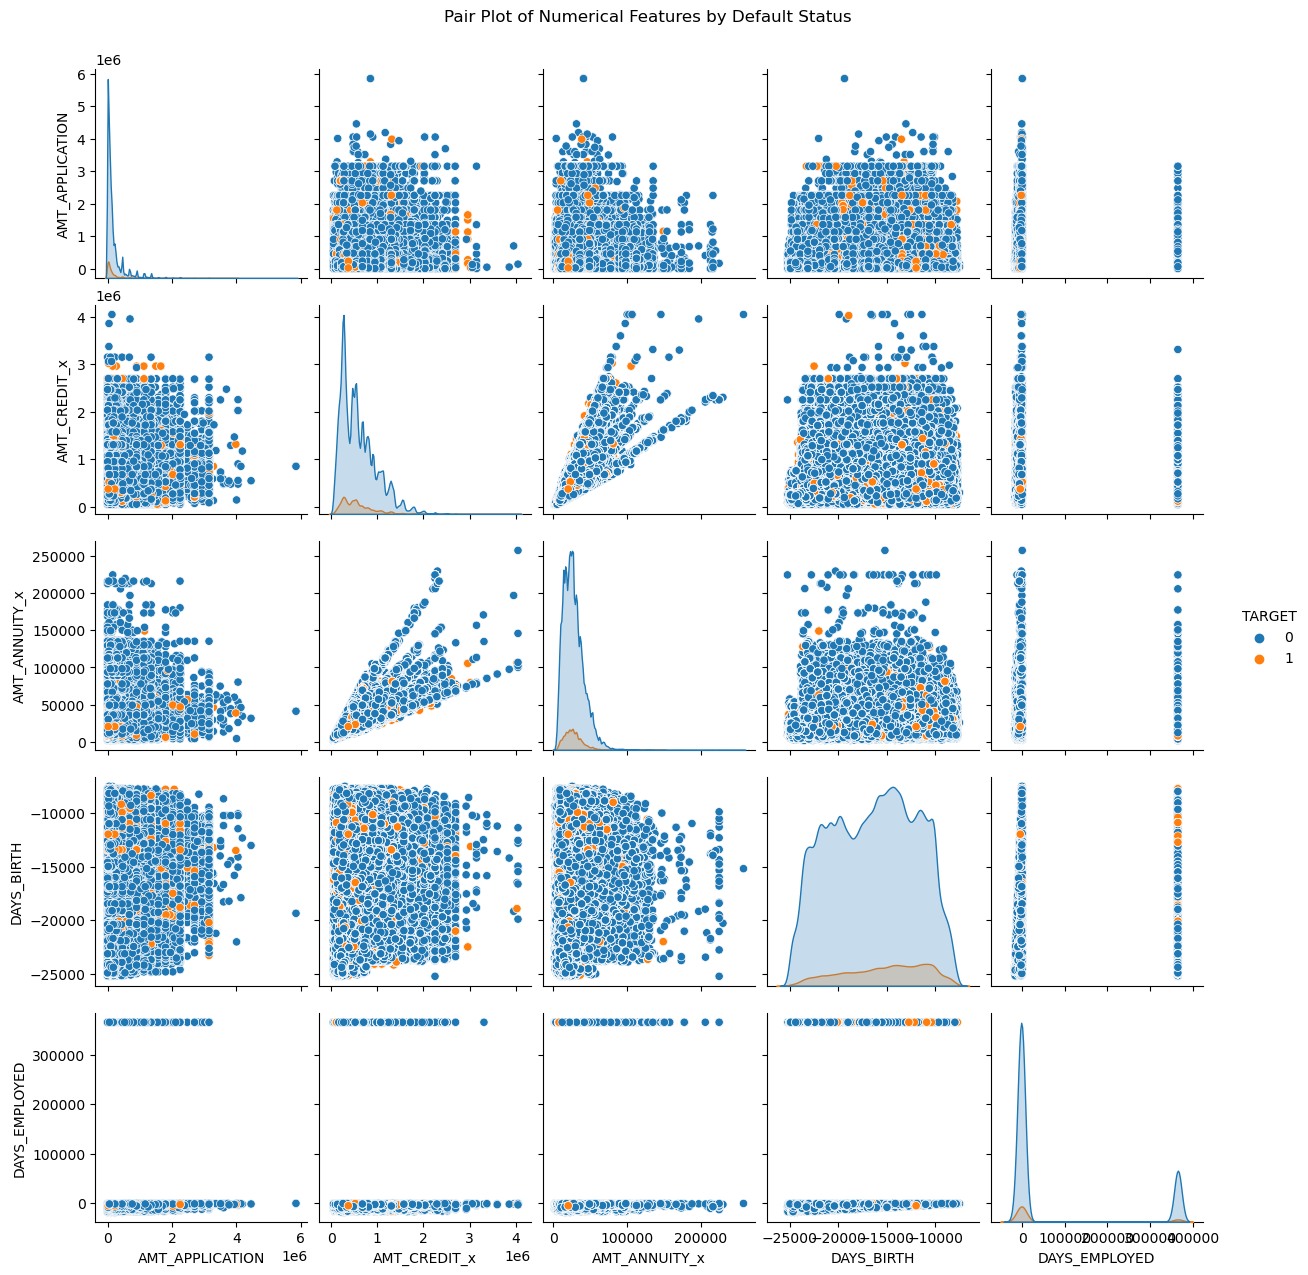

In [49]:
numerical_features = ['AMT_APPLICATION', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'DAYS_BIRTH', 'DAYS_EMPLOYED']
sns.pairplot(comb_data, vars=numerical_features, hue='TARGET')
plt.suptitle('Pair Plot of Numerical Features by Default Status', y=1.02)
plt.show()